In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Read the dataset to the python environment.


In [54]:
#reading the data set
data=pd.read_excel(r'C:\Users\amrut\Downloads\DSA\week11\CASESTUDY\iris.xls')
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [55]:
#number of rows and columns
data.shape

(150, 5)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [57]:
data['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

# 2. Do necessary pre-processing steps.


In [58]:
#checking null values
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In the dataset SL having 7, SW having 6 and PW having 6 null values

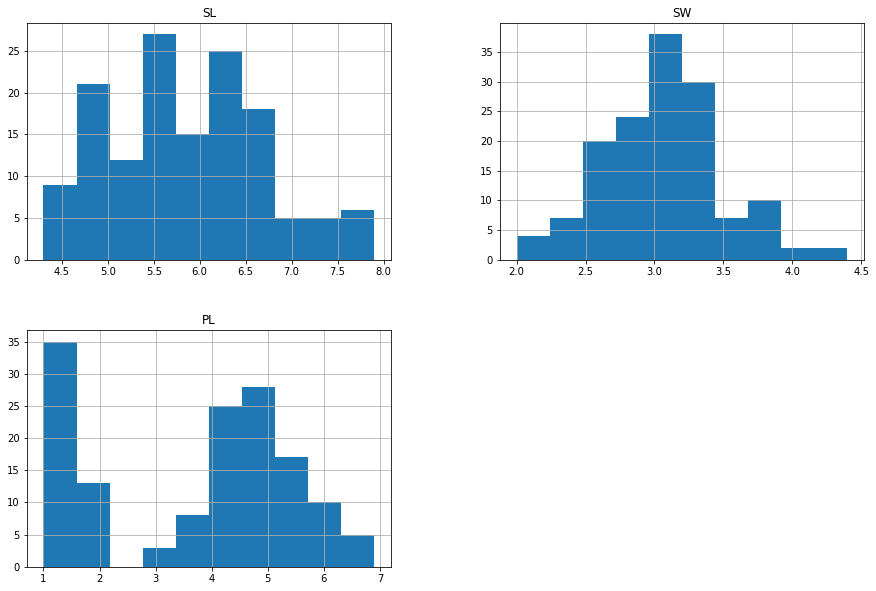

In [59]:
#representation
import matplotlib.pyplot as plt
fgraph= data[['SL','SW','PL']]
fgraph.hist(figsize=(15,10))
plt.show()

In [60]:
#replacing the null values with median
new_data=data
for i in['SL','PL','SW']:
    new_data[i]=new_data[i].fillna(new_data[i].median())
new_data  

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,Iris-setosa
1,4.9,3.0,1.40,0.2,Iris-setosa
2,5.8,3.2,1.30,0.2,Iris-setosa
3,4.6,3.1,1.50,0.2,Iris-setosa
4,5.0,3.6,1.40,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,Iris-virginica
146,6.3,2.5,5.00,1.9,Iris-virginica
147,6.5,3.0,4.35,2.0,Iris-virginica
148,6.2,3.4,5.40,2.3,Iris-virginica


In [61]:
#checking for null values
data.isna().sum()


SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

there is no null values in the dataset

Text(0.5, 1.0, 'Analysis of Iris')

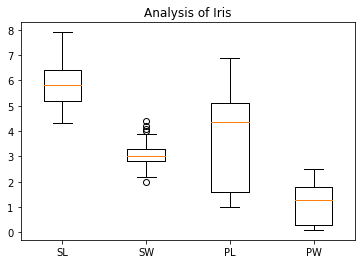

In [62]:
#for finding the outliers, plotting the boxplot of the data set,
plt.boxplot(new_data[['SL', 'SW', 'PL', 'PW']],labels=['SL', 'SW', 'PL', 'PW'])
plt.title('Analysis of Iris')

In [63]:
#SW having outliers
#dividing the data set into quartiler as Q1,Q2,Q3 for finding the IQR,lowerlimit and upper limit

Q1=np.percentile(new_data['SW'],25,interpolation='midpoint')
Q2=np.percentile(new_data['SW'],50,interpolation='midpoint')
Q3=np.percentile(new_data['SW'],75,interpolation='midpoint')
IQR=Q3-Q1
LOWER_LIMIT=Q1-1.5*IQR
UPPER_LIMIT=Q3+1.5*IQR
print('IQR=',IQR)
print('LOWER_LIMIT=',LOWER_LIMIT)
print('UPPER_LIMIT=',UPPER_LIMIT)

IQR= 0.4500000000000002
LOWER_LIMIT= 2.1249999999999996
UPPER_LIMIT= 3.9250000000000003


In [64]:
#removing the values below lower limit and above upper limit
outlier=[]
for x in new_data['SW']:
    if ((x>UPPER_LIMIT) or (x<LOWER_LIMIT)):
        outlier.append(x)
outlier    

[4.0, 4.4, 4.1, 4.2, 2.0]

In [65]:
#Finding the index of the outlier
#from the boxplot removing the UPPER limit value and LOWER limit value
# index1=new_data['SW']<LOWER_LIMIT
# new_data.loc[index1].index

index=(new_data['SW']>UPPER_LIMIT)|(new_data['SW']<LOWER_LIMIT)
dpoints=new_data.loc[index].index
new_data.drop(dpoints,inplace=True)

Text(0.5, 1.0, 'Analysis of Iris')

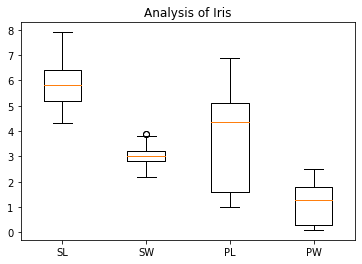

In [66]:
#for finding the outliers, plotting the boxplot of the data set,
plt.boxplot(new_data[['SL', 'SW', 'PL', 'PW']],labels=['SL', 'SW', 'PL', 'PW'])
plt.title('Analysis of Iris')

removed all the outliers

# 3. Find out which classification model gives the best result to predict iris species

In [67]:
data.describe()

,SL,SW,PL,PW
count,145.000000,145.000000,145.000000,145.000000
mean,5.867586,3.023448,3.847586,1.226897
std,0.816827,0.374354,1.712265,0.758219
min,4.300000,2.200000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.200000,5.100000,1.800000
max,7.900000,3.900000,6.900000,2.500000


In [68]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

# logistic regression

In [69]:
#checking the percentage value
data['Classification'].value_counts()
  

Iris-virginica     50
Iris-versicolor    49
Iris-setosa        46
Name: Classification, dtype: int64

In [71]:
# from sklearn.preprocessing import LabelEncoder
# label_en=LabelEncoder()
# a=['Classification']
# for i in np.arange(len(a)):
#     data[a[i]]=label_en.fit_transform(data[a[i]])
# data 
#splitting the dataset into x and y
x=data.drop(['Classification'],axis=1)
y=pd.DataFrame(data['Classification'])

In [72]:
#split the dataset into training nd testing set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [73]:
#no.of dataset in training and testing set
x_train.shape


(101, 4)

In [74]:
y_train.shape

(101, 1)

In [75]:
x_test.shape

(44, 4)

In [76]:
y_test.shape

(44, 1)

In [78]:
import warnings
warnings.filterwarnings('ignore')
#creating logistic creation
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)


LogisticRegression()

In [79]:
#predicting the value
y_pred=logit_model.predict(x_test)

In [82]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 0.9545454545454546
precision score: 0.9500891265597149
recall_score: 0.9500891265597149
f1 score: 0.9500891265597149


for the good model accuracy and f1 score is maximum, here both are 95%

In [83]:
#confusion matrix
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0, 10,  1],
       [ 0,  1, 16]], dtype=int64)

# KNN

In [101]:

#find the optimum k values, for that selecting some k values, her eselecting from 3 to 15

#creating a loop to create KNN model for each k value

from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)
   

Text(0, 0.5, 'accuracy')

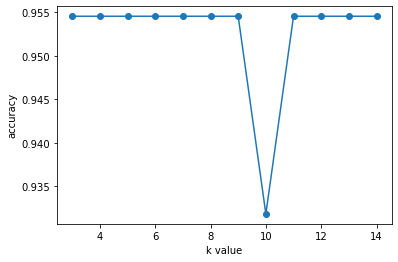

In [102]:
#for which k value got highest accuracy , for that plot a graph btw k values and accuracy
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [104]:
#making  a model with highest k value
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
classifier= KNeighborsClassifier(n_neighbors=3)
classifier.fit(x_train,y_train)
prediction=classifier.predict(x_test)



In [105]:
#printing F1_score,Accuracy score,Confusion_matrix
print("F1_score :",f1_score(y_test,prediction,average=None))
print("Accuracy score :",accuracy_score(y_test,prediction))
print("Confusion_matrix :",confusion_matrix(y_test,prediction))

F1_score : [1.         0.90909091 0.94117647]
Accuracy score : 0.9545454545454546
Confusion_matrix : [[16  0  0]
 [ 0 10  1]
 [ 0  1 16]]


accuracy is 95%

# STANDARD SCALING

In [119]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [120]:
#LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

In [121]:
#printing F1_score,Accuracy score,Confusion_matrix
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 0.9772727272727273
precision score: 0.9814814814814815
recall_score: 0.9696969696969697
f1 score: 0.9746031746031746


getting accuracy and f1 score as 97%

# SVM


In [107]:
#linear SVM
from sklearn.svm import SVC
svm_linear=SVC(kernel="linear")
svm_linear.fit(x_train,y_train) 
prediction=svm_linear.predict(x_test)
print("F1_score :",f1_score(y_test,prediction,average=None))
print("Accuracy score :",accuracy_score(y_test,prediction))
print("Confusion_matrix :",confusion_matrix(y_test,prediction))

F1_score : [1.         0.90909091 0.94117647]
Accuracy score : 0.9545454545454546
Confusion_matrix : [[16  0  0]
 [ 0 10  1]
 [ 0  1 16]]


accuracy is 95%

In [109]:
#polinomial SVM
svm_poly=SVC(kernel='poly',degree=2)
svm_poly.fit(x_train,y_train)
prediction=svm_poly.predict(x_test)
print("F1_score :",f1_score(y_test,prediction,average=None))
print("Accuracy score :",accuracy_score(y_test,prediction))
print("Confusion_matrix :",confusion_matrix(y_test,prediction))

F1_score : [1.         0.90909091 0.94117647]
Accuracy score : 0.9545454545454546
Confusion_matrix : [[16  0  0]
 [ 0 10  1]
 [ 0  1 16]]


accuracy is 95%

In [114]:
#radial basis SVM
svm_rad=SVC(kernel='rbf')
svm_rad.fit(x_train,y_train)
prediction=svm_rad.predict(x_test)
print("F1_score :",f1_score(y_test,prediction,average=None))
print("Accuracy score :",accuracy_score(y_test,prediction))
print("Confusion_matrix :",confusion_matrix(y_test,prediction))

F1_score : [1.         0.86956522 0.90909091]
Accuracy score : 0.9318181818181818
Confusion_matrix : [[16  0  0]
 [ 0 10  1]
 [ 0  2 15]]


accuracy is 93%

# Random Forest Classifier

In [115]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [116]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 0.9545454545454546
precision score: 0.9500891265597149
recall_score: 0.9500891265597149
f1 score: 0.9500891265597149


In [117]:
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0, 10,  1],
       [ 0,  1, 16]], dtype=int64)

accuracy and f1 score are same 95%

# So, we can conclude that after the standard scaling process we got the highest accuracy and f1 score as 97% .for the good model accuracy and f1 score is maximum